In [1]:
# importing some necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns  

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from nltk.tokenize import RegexpTokenizer  
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer  
from sklearn.pipeline import make_pipeline

import pickle 

In [2]:
# Loading the dataset
df= pd.read_csv("urldata.csv")

In [3]:
df.head() # Displaying the first few rows of the dataset

,url,label
0,https://www.google.com,benign
1,https://www.youtube.com,benign
2,https://www.facebook.com,benign
3,https://www.baidu.com,benign
4,https://www.wikipedia.org,benign


In [4]:
# Displaying information about the dataset, including data types and missing values
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450679 entries, 0 to 450678
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     450679 non-null  object
 1   label   450679 non-null  object
dtypes: object(2)
memory usage: 6.9+ MB


In [5]:
df.shape # Getting the shape (number of rows and columns) of the dataset

(450679, 2)

In [6]:
# Checking for missing values in the dataset
df.isnull().sum()

url      0
label    0
dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

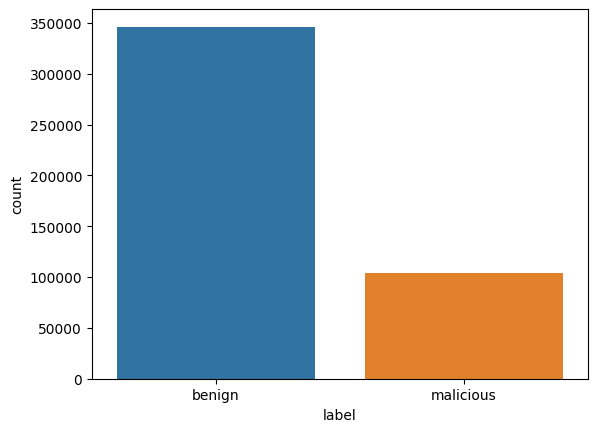

In [7]:
sns.countplot(x="label",data=df) # Creating a countplot to visualize the distribution of 'Label' in the dataset

# Tokenizing the URL strings using a regular expression tokenizer

In [8]:
tokenizer = RegexpTokenizer(r'[A-Za-z]+')

In [9]:
tokenizer.tokenize(df.url[0])

['https', 'www', 'google', 'com']

In [10]:
# Tokenizing all the URL strings in the dataset
print('Getting words tokenized ...')
df['text_tokenized'] = df.url.map(lambda t: tokenizer.tokenize(t))

Getting words tokenized ...


In [11]:
df.sample(5)

,url,label,text_tokenized
145107,https://www.awesome80s.com/Awesome80s/Sports/N...,benign,"[https, www, awesome, s, com, Awesome, s, Spor..."
110736,https://www.txgenweb4.org/txorange/births/1908...,benign,"[https, www, txgenweb, org, txorange, births, ..."
82846,https://www.openjurist.org/438/f2d/1194/mangol...,benign,"[https, www, openjurist, org, f, d, mangold, v..."
359331,http://ljefckei7-site.ctempurl.com/wfb/oam/Hom...,malicious,"[http, ljefckei, site, ctempurl, com, wfb, oam..."
123310,https://www.123people.com/s/william+bierlein,benign,"[https, www, people, com, s, william, bierlein]"


In [12]:
# Applying Snowball stemming to the tokenized words
stemmer = SnowballStemmer("english") # choose a language

In [13]:
# Getting all the stemmed words
print('Getting words stemmed ...')
df['text_stemmed'] = df['text_tokenized'].map(lambda l: [stemmer.stem(word) for word in l])

Getting words stemmed ...


In [14]:
df.sample(5)

,url,label,text_tokenized,text_stemmed
250051,https://www.montrealeroticservices.com/ad-cate...,benign,"[https, www, montrealeroticservices, com, ad, ...","[https, www, montrealeroticservic, com, ad, ca..."
434081,http://windfellows.org/administrator/modules/m...,malicious,"[http, windfellows, org, administrator, module...","[http, windfellow, org, administr, modul, mod,..."
256254,https://www.mylife.com/ricothomas,benign,"[https, www, mylife, com, ricothomas]","[https, www, mylif, com, ricothoma]"
12645,https://www.business.kellysearch.com/,benign,"[https, www, business, kellysearch, com]","[https, www, busi, kellysearch, com]"
149673,https://www.biblioz.com/fi25761643.html,benign,"[https, www, biblioz, com, fi, html]","[https, www, biblioz, com, fi, html]"


In [15]:
# Stemming all the tokenized words in the dataset
print('Get joiningwords ...')
df['text_sent'] = df['text_stemmed'].map(lambda l: ' '.join(l))

Get joiningwords ...


In [16]:
df.sample(5)

,url,label,text_tokenized,text_stemmed,text_sent
356748,http://everydaycareer.com/wp-content/uploads/i...,malicious,"[http, everydaycareer, com, wp, content, uploa...","[http, everydaycar, com, wp, content, upload, ...",http everydaycar com wp content upload index f...
136719,https://www.amazon.com/phrase/Billy-Barlow,benign,"[https, www, amazon, com, phrase, Billy, Barlow]","[https, www, amazon, com, phrase, billi, barlow]",https www amazon com phrase billi barlow
187727,https://www.facebook.com/pages/Dru-Down/105546...,benign,"[https, www, facebook, com, pages, Dru, Down]","[https, www, facebook, com, page, dru, down]",https www facebook com page dru down
267206,https://www.obraarchitects.com/,benign,"[https, www, obraarchitects, com]","[https, www, obraarchitect, com]",https www obraarchitect com
59695,https://www.investing.businessweek.com/researc...,benign,"[https, www, investing, businessweek, com, res...","[https, www, invest, businessweek, com, resear...",https www invest businessweek com research sto...


In [17]:
# Creating separate DataFrames for 'bad' and 'good' sites
bad_sites = df[df.label == 'malicious']
good_sites = df[df.label == 'benign']

In [18]:
bad_sites.head()

,url,label,text_tokenized,text_stemmed,text_sent
345738,http://atualizacaodedados.online,malicious,"[http, atualizacaodedados, online]","[http, atualizacaodedado, onlin]",http atualizacaodedado onlin
345739,http://webmasteradmin.ukit.me/,malicious,"[http, webmasteradmin, ukit, me]","[http, webmasteradmin, ukit, me]",http webmasteradmin ukit me
345740,http://stcdxmt.bigperl.in/klxtv/apps/uk/,malicious,"[http, stcdxmt, bigperl, in, klxtv, apps, uk]","[http, stcdxmt, bigperl, in, klxtv, app, uk]",http stcdxmt bigperl in klxtv app uk
345741,https://tubuh-syarikat.com/plugins/fields/files/,malicious,"[https, tubuh, syarikat, com, plugins, fields,...","[https, tubuh, syarikat, com, plugin, field, f...",https tubuh syarikat com plugin field file
345742,http://rolyborgesmd.com/exceword/excel.php?.ra...,malicious,"[http, rolyborgesmd, com, exceword, excel, php...","[http, rolyborgesmd, com, exceword, excel, php...",http rolyborgesmd com exceword excel php rand ...


In [19]:
good_sites.head()

,url,label,text_tokenized,text_stemmed,text_sent
0,https://www.google.com,benign,"[https, www, google, com]","[https, www, googl, com]",https www googl com
1,https://www.youtube.com,benign,"[https, www, youtube, com]","[https, www, youtub, com]",https www youtub com
2,https://www.facebook.com,benign,"[https, www, facebook, com]","[https, www, facebook, com]",https www facebook com
3,https://www.baidu.com,benign,"[https, www, baidu, com]","[https, www, baidu, com]",https www baidu com
4,https://www.wikipedia.org,benign,"[https, www, wikipedia, org]","[https, www, wikipedia, org]",https www wikipedia org


In [20]:
df.head()

,url,label,text_tokenized,text_stemmed,text_sent
0,https://www.google.com,benign,"[https, www, google, com]","[https, www, googl, com]",https www googl com
1,https://www.youtube.com,benign,"[https, www, youtube, com]","[https, www, youtub, com]",https www youtub com
2,https://www.facebook.com,benign,"[https, www, facebook, com]","[https, www, facebook, com]",https www facebook com
3,https://www.baidu.com,benign,"[https, www, baidu, com]","[https, www, baidu, com]",https www baidu com
4,https://www.wikipedia.org,benign,"[https, www, wikipedia, org]","[https, www, wikipedia, org]",https www wikipedia org


# Creating a machine learning model
# Using CountVectorizer to convert text data into a matrix of token counts

In [21]:
cv = CountVectorizer()

In [22]:
feature = cv.fit_transform(df.text_sent) #transform all text which we tokenize and stemed

In [23]:
feature[:5].toarray() # convert sparse matrix into array to print transformed features

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [24]:
# Splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split

In [25]:
trainX, testX, trainY, testY = train_test_split(feature, df.label, test_size = 0.3)

In [26]:
# Training a Logistic Regression model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [27]:
lr = LogisticRegression()
lr.fit(trainX,trainY)

C:\Users\Manav Patel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
# Calculating and displaying the accuracy of the Logistic Regression model on the test data
lr.score(testX,testY)

0.9973891304990976

Training Accuracy : 0.9985070132340123
Testing Accuracy : 0.9973891304990976

CLASSIFICATION REPORT

              precision    recall  f1-score   support

      benign       1.00      1.00      1.00    103958
   malicious       0.99      0.99      0.99     31246

    accuracy                           1.00    135204
   macro avg       1.00      1.00      1.00    135204
weighted avg       1.00      1.00      1.00    135204


CONFUSION MATRIX


<AxesSubplot:>

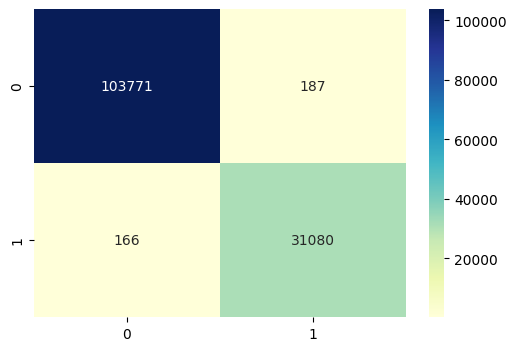

In [29]:
# creating confusing matrix
print('Training Accuracy :',lr.score(trainX,trainY))
print('Testing Accuracy :',lr.score(testX,testY))

con_mat = confusion_matrix(lr.predict(testX), testY)

print('\nCLASSIFICATION REPORT\n')
print(classification_report(lr.predict(testX), testY))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

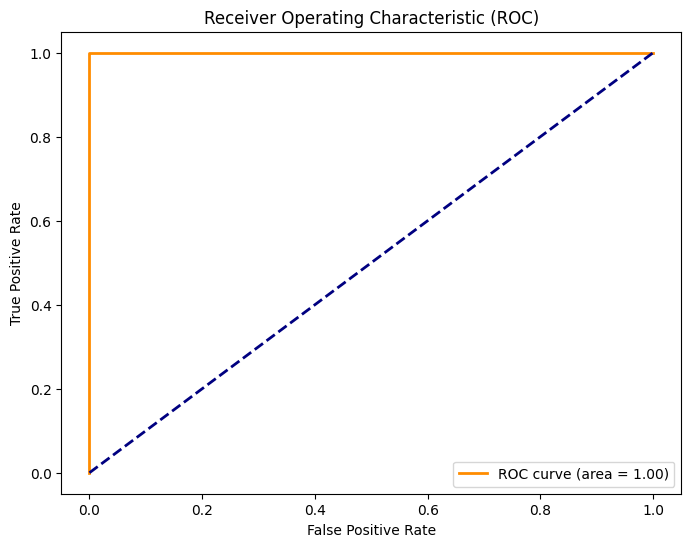

In [36]:
# Map labels to binary values
testY_binary = testY.map({'benign': 0, 'malicious': 1})

# Get predicted probabilities for the positive class
probs = loaded_model.predict_proba(testX)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(testY_binary, probs)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


#### The ROC curve in the image you provided has an AUC of 1.0, which is the perfect score. This means that the classifier is perfectly able to distinguish between positive and negative cases at all thresholds. In other words, it is able to correctly predict all positive cases and all negative cases.

In [30]:
# Logistic Regression is the best-fit model, creating a sklearn pipeline using Logistic Regression
pipeline_ls = make_pipeline(CountVectorizer(tokenizer=RegexpTokenizer(r'[A-Za-z]+').tokenize, stop_words='english'),
                            LogisticRegression())

trainX, testX, trainY, testY = train_test_split(df.url, df.label, test_size=30)

pipeline_ls.fit(trainX, trainY)

C:\Users\Manav Patel\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\Manav Patel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('countvectorizer',
                 CountVectorizer(stop_words='english',
                                 tokenizer=<bound method RegexpTokenizer.tokenize of RegexpTokenizer(pattern='[A-Za-z]+', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)>)),
                ('logisticregression', LogisticRegression())])

# Dump the model in pickle File

In [31]:
pickle.dump(pipeline_ls,open('phish.pkl','wb'))

In [32]:
import pickle

# Load the saved model
loaded_model = pickle.load(open('phish.pkl', 'rb'))

In [33]:
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer

# Define tokenizer and stemmer
tokenizer = RegexpTokenizer(r'[A-Za-z]+')
stemmer = SnowballStemmer("english")

# Tokenize the new URL
new_url = "https://bard.google.com/chat"
new_url_tokens = tokenizer.tokenize(new_url)

# Stem the tokens
new_url_stemmed = [stemmer.stem(word) for word in new_url_tokens]

# Join the stemmed tokens back into a single string
new_url_sent = ' '.join(new_url_stemmed)

In [34]:
# Make a prediction
prediction = loaded_model.predict([new_url_sent])

# The 'prediction' variable now contains the predicted label ('malicious' or 'benign')
print("Predicted Label:", prediction)

Predicted Label: ['benign']
